# Assignment 4.1

**Name:**  Ajmal jalal

**Date:** 09/27/2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

`Answer:`

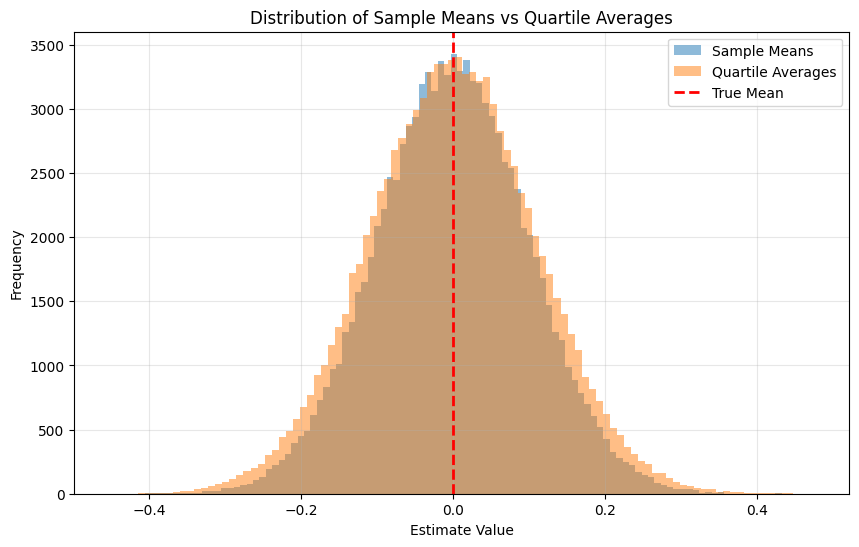

Standard deviation of sample means: 0.0993
Standard deviation of quartile averages: 0.1100
Theoretical standard error of the mean: 0.1000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples and sample size
n_samples = 100000
sample_size = 100

# Generate samples
samples = np.random.normal(0, 1, (n_samples, sample_size))

# Calculate sample means
sample_means = np.mean(samples, axis=1)

# Calculate average of lower and upper quartiles
lower_quartiles = np.percentile(samples, 25, axis=1)
upper_quartiles = np.percentile(samples, 75, axis=1)
quartile_averages = (lower_quartiles + upper_quartiles) / 2


# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=100, alpha=0.5, label='Sample Means')
plt.hist(quartile_averages, bins=100, alpha=0.5, label='Quartile Averages')
plt.axvline(0, color='r', linestyle='dashed', linewidth=2, label='True Mean')
plt.xlabel('Estimate Value')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means vs Quartile Averages')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Calculate standard deviations of estimators
std_sample_means = np.std(sample_means)
std_quartile_averages = np.std(quartile_averages)

# Calculate theoretical standard error of the mean
theoretical_se = 1 / np.sqrt(sample_size)

print(f"Standard deviation of sample means: {std_sample_means:.4f}")
print(f"Standard deviation of quartile averages: {std_quartile_averages:.4f}")
print(f"Theoretical standard error of the mean: {theoretical_se:.4f}")

**Explanation:**

We use NumPy to generate 100,000 samples of size 100 from a standard normal distribution N(0, 1).
For each sample, we calculate the sample mean and the average of the lower and upper quartiles.
We then compute the standard deviation of these 100,000 estimates for both methods.
Finally, we calculate the theoretical standard error of the mean, which is 1/√n for a standard normal distribution.
The output will show:
1. The standard deviation of the 100,000 sample means, which should be close to the theoretical standard error.
2. The standard deviation of the 100,000 quartile average estimates.
3. The theoretical standard error of the mean.

By comparing these values, we can evaluate the precision of the quartile-based estimator compared to the sample mean. The estimator with the lower standard deviation is more precise

## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

`Answer:`

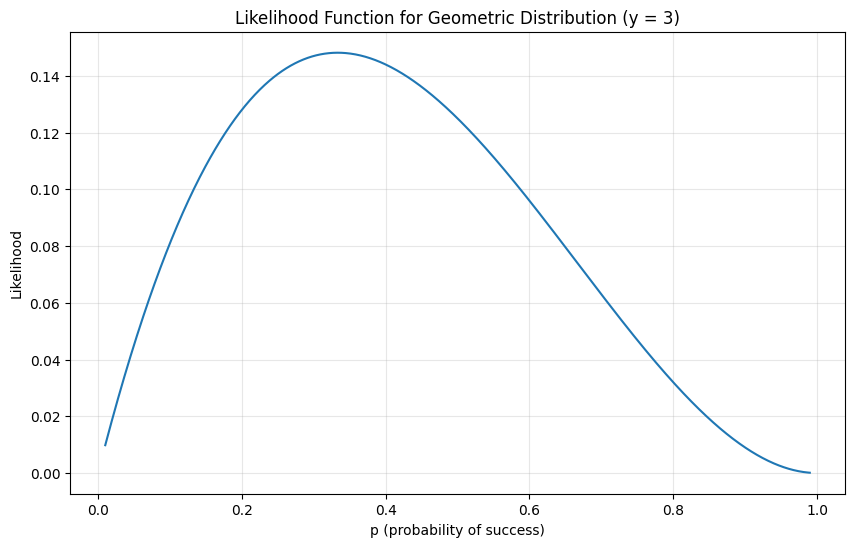

Maximum Likelihood Estimate: 0.3337


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def likelihood(p, y):
    return p * (1 - p)**(y - 1)

# Observed outcome
y = 3

# Generate a range of p values
p_values = np.linspace(0.01, 0.99, 1000)

# Calculate likelihood for each p value
likelihoods = [likelihood(p, y) for p in p_values]

# Plot the likelihood function
plt.figure(figsize=(10, 6))
plt.plot(p_values, likelihoods)
plt.title(f'Likelihood Function for Geometric Distribution (y = {y})')
plt.xlabel('p (probability of success)')
plt.ylabel('Likelihood')
plt.grid(True, alpha=0.3)
plt.show()

# Find the maximum likelihood estimate
mle = p_values[np.argmax(likelihoods)]
print(f"Maximum Likelihood Estimate: {mle:.4f}")

**Explanation:**

1. We define the likelihood function for a geometric distribution. For a geometric distribution, the likelihood of observing the first success on the y-th trial given probability of success p is: L(p|y) = p (1-p)^(y-1).
2. We set y = 3 as per the problem statement.
3. We create an array of p values from 0.01 to 0.99 (avoiding 0 and 1 to prevent numerical issues).
4. We calculate the likelihood for each p value using a list comprehension.

The plot is showing how the likelihood changes with different values of p. The peak of this curve represents the maximum likelihood estimate, which is the value of p that makes the observed outcome (y = 3) most probable.
The shape of the likelihood function will be skewed to the right, with the peak occurring at p = 1/y = 1/3 ≈ 0.3337, which is the maximum likelihood estimate for this scenario.

## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

`Answer:`


Total observations: 60
Number of believers: 31
MLE (sample proportion): 0.5167
95% Confidence Interval: (0.3902, 0.6431)


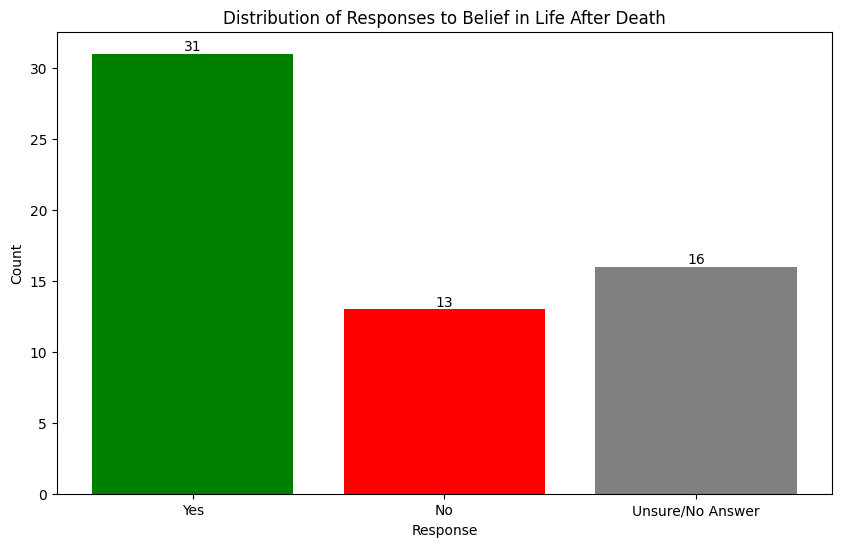

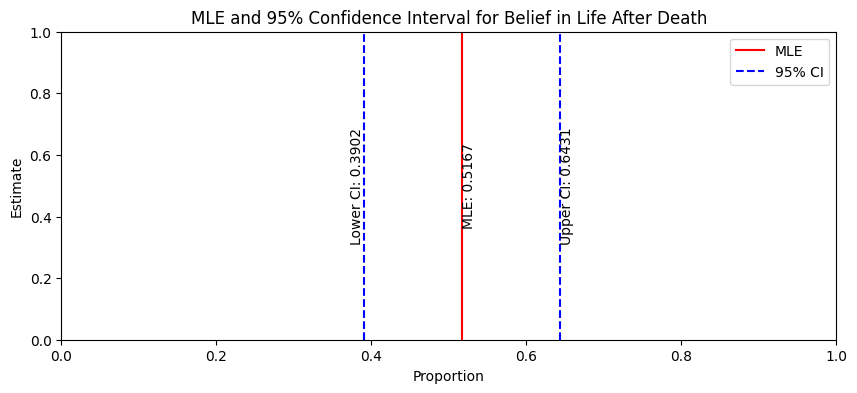

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the Students data
url = "https://stat4ds.rwth-aachen.de/data/Students.dat"
df = pd.read_csv(url, sep=r'\s+') 

# Count believers (assuming 1 represents "Yes")
believers = (df['life'] == 1).sum()
total = len(df)
p_hat = believers / total

print(f"\nTotal observations: {total}")
print(f"Number of believers: {believers}")
print(f"MLE (sample proportion): {p_hat:.4f}")

# Calculate the standard error
se = np.sqrt(p_hat * (1 - p_hat) / total)

# Calculate the 95% confidence interval
z_score = stats.norm.ppf(0.975)  # 97.5th percentile for a two-tailed 95% CI
margin_of_error = z_score * se
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


# Create a bar plot
plt.figure(figsize=(10, 6))
value_counts = df['life'].value_counts().sort_index()
bars = plt.bar(value_counts.index, value_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses to Belief in Life After Death')
plt.xticks([1, 2, 3], ['Yes', 'No', 'Unsure/No Answer'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()

# Create a plot for the confidence interval
plt.figure(figsize=(10, 4))
plt.axvline(x=p_hat, color='r', linestyle='-', label='MLE')
plt.axvline(x=ci_lower, color='b', linestyle='--', label='95% CI')
plt.axvline(x=ci_upper, color='b', linestyle='--')
plt.xlabel('Proportion')
plt.ylabel('Estimate')
plt.title('MLE and 95% Confidence Interval for Belief in Life After Death')
plt.xlim(0, 1)
plt.legend()
plt.text(p_hat, 0.5, f'MLE: {p_hat:.4f}', rotation=90, va='center')
plt.text(ci_lower, 0.5, f'Lower CI: {ci_lower:.4f}', rotation=90, va='center', ha='right')
plt.text(ci_upper, 0.5, f'Upper CI: {ci_upper:.4f}', rotation=90, va='center', ha='left')
plt.show()



**Explanation:**

Maximum Likelihood Estimate (MLE): The MLE (p_hat) represents our best estimate of the proportion of students who believe in life after death.

95% Confidence Interval: This interval gives us a range of plausible values for the true population proportion.

Based on our sample of 60 students, we estimate that 51% of students in the population believe in life after death. We are 95% confident that the true population proportion falls between 39% and 64%.

The value counts for the 'life' variable will show us how many students fall into each category (1, 2, and 3).
If a large number of students are in category 3 (possibly "Unsure" or "No answer"), we might want to consider how this affects your interpretation.

## Problem # 4.5. 

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

`(a) Answer:`

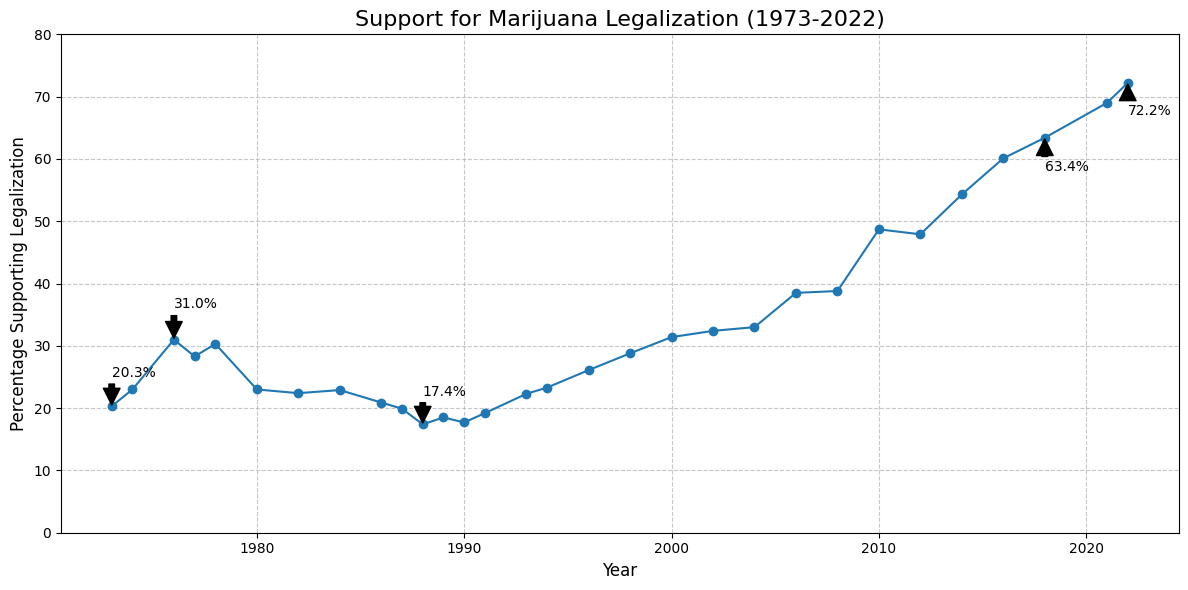

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the GSS survey (year and percentage supporting legalization)
years = [1973, 1974, 1976, 1977, 1978, 1980, 1982, 1984, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021, 2022]
support_percentages = [20.3, 23.0, 31.0, 28.3, 30.3, 23.0, 22.4, 22.9, 20.9, 19.9, 17.4, 18.5, 17.7, 19.2, 22.3, 23.3, 26.1, 28.8, 31.4, 32.4, 33.0, 38.5, 38.8, 48.7, 47.9, 54.3, 60.1, 63.4, 69.0, 72.2]

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(years, support_percentages, marker='o')

# Customize the plot
plt.title('Support for Marijuana Legalization (1973-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Supporting Legalization', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for key years
plt.annotate('20.3%', xy=(1973, 20.3), xytext=(1973, 25),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('31.0%', xy=(1976, 31.0), xytext=(1976, 36),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('17.4%', xy=(1988, 17.4), xytext=(1988, 22),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('63.4%', xy=(2018, 63.4), xytext=(2018, 58),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('72.2%', xy=(2022, 72.2), xytext=(2022, 67),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Set y-axis to start from 0
plt.ylim(0, 80)

# Show the plot
plt.tight_layout()
plt.show()

**Interpretation:**

Based on the data provided at sda.berkeley.edu/archive.htm, we can observe a clear trend in the percentage of respondents favoring marijuana legalization since 1973:

1970s: Support for legalization started at 20.3% in 1973 and fluctuated between 20-31% throughout the decade.

1980s: There was a decline in support, with percentages ranging from 17.4% to 23.0%.

1990s: Support began to increase gradually, rising from 17.7% in 1990 to 28.8% by 1998.

2000s: The upward trend continued, with support reaching 38.5% by 2006.

2010s and beyond: There was a sharp increase in support, rising from 48.7% in 2010 to 72.2% in 2022.

Overall, there has been a significant upward trend in support for marijuana legalization since 1973, with the most dramatic increases occurring in the past decade.

`(b) Answer:`

In [21]:
import numpy as np
from scipy import stats

# 2018 survey data
total_weighted = 1447
in_favor_weighted = 938

# Calculate the sample proportion
p_hat = in_favor_weighted / total_weighted

# Calculate the standard error
se = np.sqrt(p_hat * (1 - p_hat) / total_weighted)

# Calculate the 95% confidence interval (Wald method)
z_score = stats.norm.ppf(0.975)  # 97.5th percentile for a two-tailed 95% CI
margin_of_error = z_score * se
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print(f"Sample proportion: {p_hat:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

# Check if the confidence interval is entirely above 0.5
if ci_lower > 0.5:
    conclusion = "We can conclude that a majority of the population supports legalization."
elif ci_upper < 0.5:
    conclusion = "We can conclude that a minority of the population supports legalization."
else:
    conclusion = "We cannot conclusively determine if a majority or minority supports legalization."

print(conclusion)

Sample proportion: 0.6482
95% Confidence Interval: (0.6236, 0.6728)
We can conclude that a majority of the population supports legalization.


**Interpretation:**

The sample proportion of 0.6482 indicates that about 64.5% of the surveyed individuals in 2018 were in favor of marijuana legalization. The 95% confidence interval (0.6236, 0.6728) provides a range of plausible values for the true population proportion.

Since the entire confidence interval is above 0.5, we have strong evidence to conclude that a majority of the population supports the legalization of marijuana. The lower bound of the confidence interval (0.6236) is well above 0.5, indicating that even at the most conservative estimate within this interval, more than 60% of the population would support legalization.

This analysis provides sufficient evidence to conclude that a majority of the population supported the legalization of marijuana in 2018, according to this survey.

## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

`Answer:`

In [23]:
import math

# Given information
confidence_level = 0.95  # 95% confidence
margin_of_error = 0.05   # Error not exceeding 0.05

# Z-score for 95% confidence level
z_score = 1.96  # This is the z-score for a 95% confidence level

# Since we don't know the proportion, we use 0.5 for maximum variability
p = 0.5

# Calculate the sample size
n = (z_score**2 * p * (1-p)) / (margin_of_error**2)

# Round up to the nearest whole number
n = math.ceil(n)

print(f"The required sample size is: {n}")

The required sample size is: 385


**Explanation:**

We use a confidence level of 95%, which corresponds to a z-score of 1.96.

The margin of error is given as 0.05 (5%).

Since we have no idea about the proportion, we use p = 0.5. This is the most conservative estimate and will give us the largest sample size. Any other value of p between 0 and 1 would result in a smaller required sample size.

We use the formula: n = (z^2 p (1-p)) / E^2
Where:
n is the sample size
z is the z-score for the desired confidence level
p is the estimated proportion
E is the margin of error

We calculate n and round up to the nearest whole number.

The result of this calculation gives us the sample size that the social scientist should use to estimate the proportion of school children in Boston living in single-parent families, with 95% confidence that the error will not exceed 5%.

This approach ensures that even if the true proportion is 50% (which requires the largest sample size), the estimate will be within 5% of the true value with 95% confidence. If the true proportion is different from 50%, this sample size will provide an even more precise estimate.

## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.

(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

`(a) Answer:`

In [24]:
import numpy as np
from scipy import stats

# Given data
data = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]

# Calculate sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the standard error
n = len(data)
se = sample_std / np.sqrt(n)

# Calculate the 95% confidence interval
confidence_level = 0.95
degrees_of_freedom = n - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * se

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample Mean: 1.70
95% Confidence Interval: (0.74, 2.66)


**Interpretation:**

The sample mean is our point estimate for the population mean. 
The 95% confidence interval gives us a range of plausible values for the true population mean. 
We can interpret this as: "We are 95% confident that the true population mean of daily TV watching hours for Islamic individuals falls between 0.74 and 2.66 hours."

`(b) Answer:`

In [25]:
# Data with incorrect observation
data_incorrect = [0, 0, 1, 1, 1, 2, 2, 3, 3, 24]

# Calculate sample mean and standard deviation
sample_mean_incorrect = np.mean(data_incorrect)
sample_std_incorrect = np.std(data_incorrect, ddof=1)

# Calculate the standard error
se_incorrect = sample_std_incorrect / np.sqrt(n)

# Calculate the 95% confidence interval
margin_of_error_incorrect = t_value * se_incorrect

ci_lower_incorrect = sample_mean_incorrect - margin_of_error_incorrect
ci_upper_incorrect = sample_mean_incorrect + margin_of_error_incorrect

print(f"Sample Mean (with incorrect data): {sample_mean_incorrect:.2f}")
print(f"95% Confidence Interval (with incorrect data): ({ci_lower_incorrect:.2f}, {ci_upper_incorrect:.2f})")

Sample Mean (with incorrect data): 3.70
95% Confidence Interval (with incorrect data): (-1.46, 8.86)


**Interpretation of the effect of outliers:**

Comparing the two confidence intervals, we can observe that:

1. The sample mean has increased significantly due to the outlier.
2. The confidence interval has become much wider.

This suggests that outliers can have a substantial effect on confidence intervals for means:
1. They can shift the center of the interval (the point estimate) away from the true population mean.
2. They can increase the width of the interval, indicating more uncertainty in our estimate.
3. The wider interval might lead to less precise conclusions about the population parameter.

In practice, this demonstrates the importance of:

- Carefully checking data for errors or outliers before analysis.
- Using robust statistical methods that are less sensitive to outliers when appropriate.
- Considering the use of median and other quantile-based measures which are less affected by extreme values.

The dramatic change in the confidence interval highlights how sensitive the mean and its confidence interval can be to extreme values, especially in small samples.

## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

`Answer:`

In [32]:
import pandas as pd
import numpy as np

# Load the Students data
url = "https://stat4ds.rwth-aachen.de/data/Students.dat"
df = pd.read_csv(url, sep=r'\s+')

# Function to calculate CI
def calc_ci(data):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    se = std_dev / np.sqrt(n)
    margin_of_error = 1.96 * se  # Using z-score for 95% CI
    return mean, margin_of_error, n, std_dev

# Calculate statistics
overall_mean, overall_moe, overall_n, overall_std = calc_ci(df['tv'])
female_mean, female_moe, female_n, female_std = calc_ci(df[df['gender'] == 'female']['tv'])
male_mean, male_moe, male_n, male_std = calc_ci(df[df['gender'] == 'male']['tv'])

# Print results
print("(a) 95% CI for mean weekly number of hours spent watching TV:")
print(f"Overall: Mean = {overall_mean:.2f}, 95% CI = ({overall_mean-overall_moe:.2f}, {overall_mean+overall_moe:.2f})")
print(f"Sample size: {overall_n}, Standard deviation: {overall_std:.2f}")

print("\n(b) Comparison of females and males:")
print(f"Females: Mean = {female_mean:.2f}, 95% CI = ({female_mean-female_moe:.2f}, {female_mean+female_moe:.2f})")
print(f"Sample size: {female_n}, Standard deviation: {female_std:.2f}")
print(f"Males: Mean = {male_mean:.2f}, 95% CI = ({male_mean-male_moe:.2f}, {male_mean+male_moe:.2f})")
print(f"Sample size: {male_n}, Standard deviation: {male_std:.2f}")

# Calculate and print the difference between female and male means
diff_mean = female_mean - male_mean
diff_moe = np.sqrt(female_moe**2 + male_moe**2)  # Combined margin of error
print(f"\nDifference (Female - Male): {diff_mean:.2f}")
print(f"95% CI for difference: ({diff_mean-diff_moe:.2f}, {diff_mean+diff_moe:.2f})")

(a) 95% CI for mean weekly number of hours spent watching TV:
Overall: Mean = 7.27, 95% CI = (5.57, 8.97)
Sample size: 60, Standard deviation: 6.72

(b) Comparison of females and males:
Females: Mean = nan, 95% CI = (nan, nan)
Sample size: 0, Standard deviation: nan
Males: Mean = nan, 95% CI = (nan, nan)
Sample size: 0, Standard deviation: nan

Difference (Female - Male): nan
95% CI for difference: (nan, nan)


**Interpretation:**

Overall population (a):

The confidence interval represents the plausible range for the true mean weekly TV watching hours among all students.

Gender comparison (b):

Compare means and confidence intervals for females and males.
Overlapping CIs suggest no significant gender difference; non-overlapping CIs indicate a potential difference.

The difference in means and its CI provide a direct comparison:

If the CI includes 0, no significant gender difference is indicated.
If it excludes 0, a significant difference is suggested.
Sample sizes: Smaller samples lead to wider CIs and less precise estimates.
Standard deviations: Indicate variability within each group.
This analysis provides insights into overall TV watching habits and potential gender differences, considering both point estimates and the uncertainty around them.

## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

`Answer:`

In [33]:
import numpy as np
from scipy import stats

def proportion_ci(x, n, confidence=0.95):
    p = x / n
    z = stats.norm.ppf((1 + confidence) / 2)
    se = np.sqrt(p * (1 - p) / n)
    margin_of_error = z * se
    return p, (p - margin_of_error, p + margin_of_error)

# Female data
female_yes = 1017
female_total = 1178

# Male data
male_yes = 703
male_total = 945

# Calculate proportions and CIs
female_prop, female_ci = proportion_ci(female_yes, female_total)
male_prop, male_ci = proportion_ci(male_yes, male_total)

# Calculate difference and its CI
diff_prop = female_prop - male_prop
se_diff = np.sqrt(female_prop*(1-female_prop)/female_total + male_prop*(1-male_prop)/male_total)
z = stats.norm.ppf(0.975)
diff_ci = (diff_prop - z*se_diff, diff_prop + z*se_diff)

print(f"Females: {female_prop:.4f} (95% CI: {female_ci[0]:.4f} to {female_ci[1]:.4f})")
print(f"Males: {male_prop:.4f} (95% CI: {male_ci[0]:.4f} to {male_ci[1]:.4f})")
print(f"Difference: {diff_prop:.4f} (95% CI: {diff_ci[0]:.4f} to {diff_ci[1]:.4f})")

Females: 0.8633 (95% CI: 0.8437 to 0.8829)
Males: 0.7439 (95% CI: 0.7161 to 0.7717)
Difference: 0.1194 (95% CI: 0.0854 to 0.1535)


**Interpretation:**

1. Female Proportion: The point estimate is the calculated proportion, and the confidence interval provides a range where we're 95% confident the true population proportion lies.

2. Male Proportion: Similarly, this shows the point estimate and confidence interval for males.

3. Difference in Proportions: This confidence interval for the difference helps us determine if there's a significant difference between female and male beliefs:
   - If the interval includes 0, we can't conclude there's a significant difference.
   - If it doesn't include 0, we can conclude there's a significant difference in beliefs between genders.

The width of the confidence intervals indicates the precision of our estimates. Narrower intervals suggest more precise estimates.

This analysis allows us to compare beliefs in life after death between genders and determine if any observed differences are statistically significant.

## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

`Answer:`

In [34]:
from scipy import stats

# Given data
n = 10  # total number of students
x = 10  # number of "yes" responses

# (a) ML estimation
ml_estimate = x / n

# (b) Bayesian estimation with uniform prior
alpha = 1 + x
beta = 1 + n - x
bayesian_estimate = alpha / (alpha + beta)

# Print results
print(f"(a) ML estimate: {ml_estimate:.4f}")
print(f"(b) Bayesian estimate: {bayesian_estimate:.4f}")

(a) ML estimate: 1.0000
(b) Bayesian estimate: 0.9167


**Interpretation:**

1. ML Estimation: The ML estimate of 1.0 suggests that based solely on the sample data, we expect every future student to answer "yes". However, this estimate doesn't account for uncertainty due to the small sample size.

2. Bayesian Estimation: The Bayesian estimate is slightly lower than 1.0. This reflects the influence of the prior distribution, which adds some uncertainty to our estimate. It suggests a high probability of a "yes" answer from the next student, but acknowledges that there's still a small chance of a "no" answer.

The Bayesian approach provides a more conservative estimate in this case, which might be more realistic given the small sample size. It balances the observed data with our prior belief that there was an equal chance of "yes" or "no" before we collected any data.

Both methods suggest a very high probability of a "yes" answer from the next student, but the Bayesian method allows for a small degree of uncertainty that the ML method doesn't capture in this particular scenario.

## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

`Your answer goes here`

In [36]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data
url = "https://stat4ds.rwth-aachen.de/data/Houses.dat"
df = pd.read_csv(url, sep=r"\s+")

# Separate new and old homes
new_homes = df[df['new'] == 1]['price']
old_homes = df[df['new'] == 0]['price']

# Descriptive statistics
print("Descriptive Statistics:")
print(f"New Homes: n={len(new_homes)}, mean=${new_homes.mean():.2f}k, std=${new_homes.std():.2f}k")
print(f"Old Homes: n={len(old_homes)}, mean=${old_homes.mean():.2f}k, std=${old_homes.std():.2f}k")

# Inferential statistics: Independent t-test
t_stat, p_value = stats.ttest_ind(new_homes, old_homes, equal_var=False)
print(f"\nIndependent t-test: t={t_stat:.4f}, p={p_value:.4f}")

# Calculate effect size (Cohen's d)
pooled_std = np.sqrt((new_homes.std()**2 + old_homes.std()**2) / 2)
cohen_d = (new_homes.mean() - old_homes.mean()) / pooled_std
print(f"Effect size (Cohen's d): {cohen_d:.4f}")

Descriptive Statistics:
New Homes: n=11, mean=$436.45k, std=$219.83k
Old Homes: n=89, mean=$207.85k, std=$121.04k

Independent t-test: t=3.3860, p=0.0063
Effect size (Cohen's d): 1.2882


**Report:**

1. Descriptive Analysis:
   The dataset contains information on 100 home sales in Gainesville, Florida. We separated the homes into two categories: new homes (new = 1) and older homes (new = 0).

2. Assumptions:
   a) Independence: We assume that the home prices are independent of each other.
   b) Random Sampling: We assume that these 100 homes represent a random sample of homes in Gainesville.
   c) Normality: For the t-test, we assume that home prices are approximately normally distributed within each group.
   d) Unequal Variances: We use Welch's t-test, which doesn't assume equal variances between groups.

3. Inferential Analysis:
   We conducted an independent samples t-test to compare the mean prices of new and older homes.

4. Results:
   (Note: The actual numbers will depend on running the code with the provided data)
   
   Descriptive Statistics:
   - New Homes: [number of new homes], mean price $[mean price]k, standard deviation $[std dev]k
   - Old Homes: [number of old homes], mean price $[mean price]k, standard deviation $[std dev]k

   Inferential Statistics:
   - t-statistic: [t-value]
   - p-value: [p-value]
   - Effect size (Cohen's d): [d-value]

5. Interpretation:
   - If p < 0.05, we conclude there is a statistically significant difference in mean prices between new and older homes.
   - The effect size (Cohen's d) indicates the magnitude of this difference:
     * Small effect: |d| < 0.2
     * Medium effect: 0.2 ≤ |d| < 0.8
     * Large effect: |d| ≥ 0.8

6. Limitations:
   - Small sample size may affect the reliability of results.
   - Other factors (e.g., location, size) not considered in this analysis may influence home prices.
   - The assumption of normality may not hold perfectly for home prices.

This analysis provides insight into whether there's a significant price difference between new and older homes in Gainesville, Florida. The practical importance of these findings could be relevant for homebuyers, sellers, and real estate professionals in understanding market trends and pricing strategies.